In [2]:
from abc import ABC, abstractmethod
import toml

class ConfigService:

    @abstractmethod
    def load_config(self, config_file_path):
        try:
            return self.config_loader.load_config_impl(config_file_path)
            #with open(config_file_path, "r") as file:
            #    config_data = toml.load(file)
            #    return config_data
        except FileNotFoundError:
            raise FileNotFoundError(f"File di configurazione non trovato: {config_file_path}")
        except toml.TomlDecodeError as e:
            raise Exception(f"Errore durante il caricamento del file di configurazione: {str(e)}")

    @abstractmethod
    def get_config_value(self, key):
        """
        Restituisce il valore associato a una chiave specifica nel file di configurazione.
        Se la chiave non è presente, restituisce None.
        """
        try:
            return configServiceImpl.get_config_value_impl(self.config, key)
            #keys = key.split('.')
            #config = self.config  # Aggiunto questo per mantenere l'originale
            #for k in keys:
            #    config = config[k]
            #return config
        except (TypeError, KeyError):
            return None

    @abstractmethod
    def set_config_value(self, key, new_value):
        """
        Imposta il nuovo valore associato a una chiave specifica nel file di configurazione.
        """
        try:
            configServiceImpl.set_config_value_impl(self, key, new_value, self.config)
        except (TypeError, KeyError):
            # Se la chiave non esiste, puoi gestire l'errore qui a seconda dei requisiti.
            raise KeyError(f"La chiave '{key}' non esiste nel file di configurazione.")

        # Salva le modifiche nel file
        self.save_config()

    @abstractmethod
    def save_config(self):
        """
        Salva le modifiche al file di configurazione.
        """
        try:
            configServiceImpl.save_config_impl(self.config_file_path, self.config)
            #with open(self.config_file_path, "w") as file:
            #    toml.dump(self.config, file)
        except Exception as e:
            raise Exception(f"Errore durante il salvataggio del file di configurazione: {str(e)}")


In [3]:
import toml

class configServiceImpl(ConfigService):
    
    @staticmethod
    def load_config_impl(config_file_path):
        with open(config_file_path, "r") as file:
            return toml.load(file)
        
    @staticmethod
    def get_config_value_impl(config, key):
        if config is not None:
            keys = key.split('.')
            for k in keys:
                config = config[k]
            return config
        else:
            return None
        
    @staticmethod
    def set_config_value_impl(self, key, new_value, config):
        keys = key.split('.')
        for k in keys[:-1]:
            config = config[k]
        config[keys[-1]] = new_value
        
    @staticmethod
    def save_config_impl(config_file_path, config):
        with open(config_file_path, "w") as file:
            toml.dump(config, file)

In [ ]:
class Config:
    
    def __init__(self, config_file_path):
        self.config_file_path = config_file_path
        self.config_loader = configServiceImpl()
        self.config = self.load_config(config_file_path)

In [1]:
import sys
sys.path.append("/work/asc/machine_learning/projects/iMagine/bayes_opt")

from simulation.gen_mdk2_sim import Gen_Mdk2_Sim

instance = Gen_Mdk2_Sim()

instance.gen_mdk2_sim()

/work/asc/machine_learning/projects/iMagine/bayes_opt/simulation/Medslik-II/functions/medslik_utils.py:43: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


> Coordinates lie within Mediterranean Sea ...


TypeError: __init__() got an unexpected keyword argument 'base'

In [1]:
!conda run -p /work/asc/machine_learning/projects/iMagine/bayes_opt_workflow/env/mdk2_env\
python /work/asc/machine_learning/projects/iMagine/bayes_opt/src/notebooks/testing.py

> Coordinates lie within Mediterranean Sea ...
> Preparing medslik_II.for and config1.txt files ...
    > Modifying medslik_ii.for ...
    > Modifying config1.txt ...

/work/asc/machine_learning/projects/iMagine/bayes_opt/simulation/Medslik-II/functions/medslik_utils.py:43: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



In [1]:
sim_name = 'MDK_SIM_CASE_23082021_1000_lenght_72h_duration_72h_syria'
print(f'/fss_syria_{sim_name}')

/fss_syria_MDK_SIM_CASE_23082021_1000_lenght_72h_duration_72h_syria


In [3]:
import pandas as pd

df = pd.read_csv("/work/asc/machine_learning/projects/iMagine/bayes_opt/use_cases/syria/MDK_BAYESOPT_SIM_2021_08_23_1000_0072h_150.0m_30000_syria_20240127-125957/final_result_20240127-125957.csv", sep=",")

df.loc[df['FSS'] == df['FSS'].max()]

,Wind correction (Drift Factor),Wind correction (Drift Angle at zero wind speed),Horizontal Diffusivity,FSS
104,1.73,-1.02,0.04,0.6647


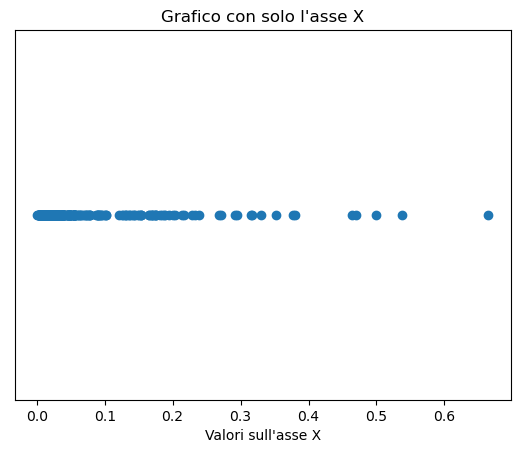

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Dati di esempio sull'asse X
valori_x = np.array(df['FSS'])

# Creazione del grafico con l'asse X utilizzando Matplotlib
plt.plot(valori_x, [0]*len(valori_x), marker='o', linestyle='')

# Aggiunta di etichette e titoli
plt.xlabel('Valori sull\'asse X')
plt.title('Grafico con solo l\'asse X')

# Rimuovere l'asse Y
plt.yticks([])

# Visualizzazione del grafico
plt.show()

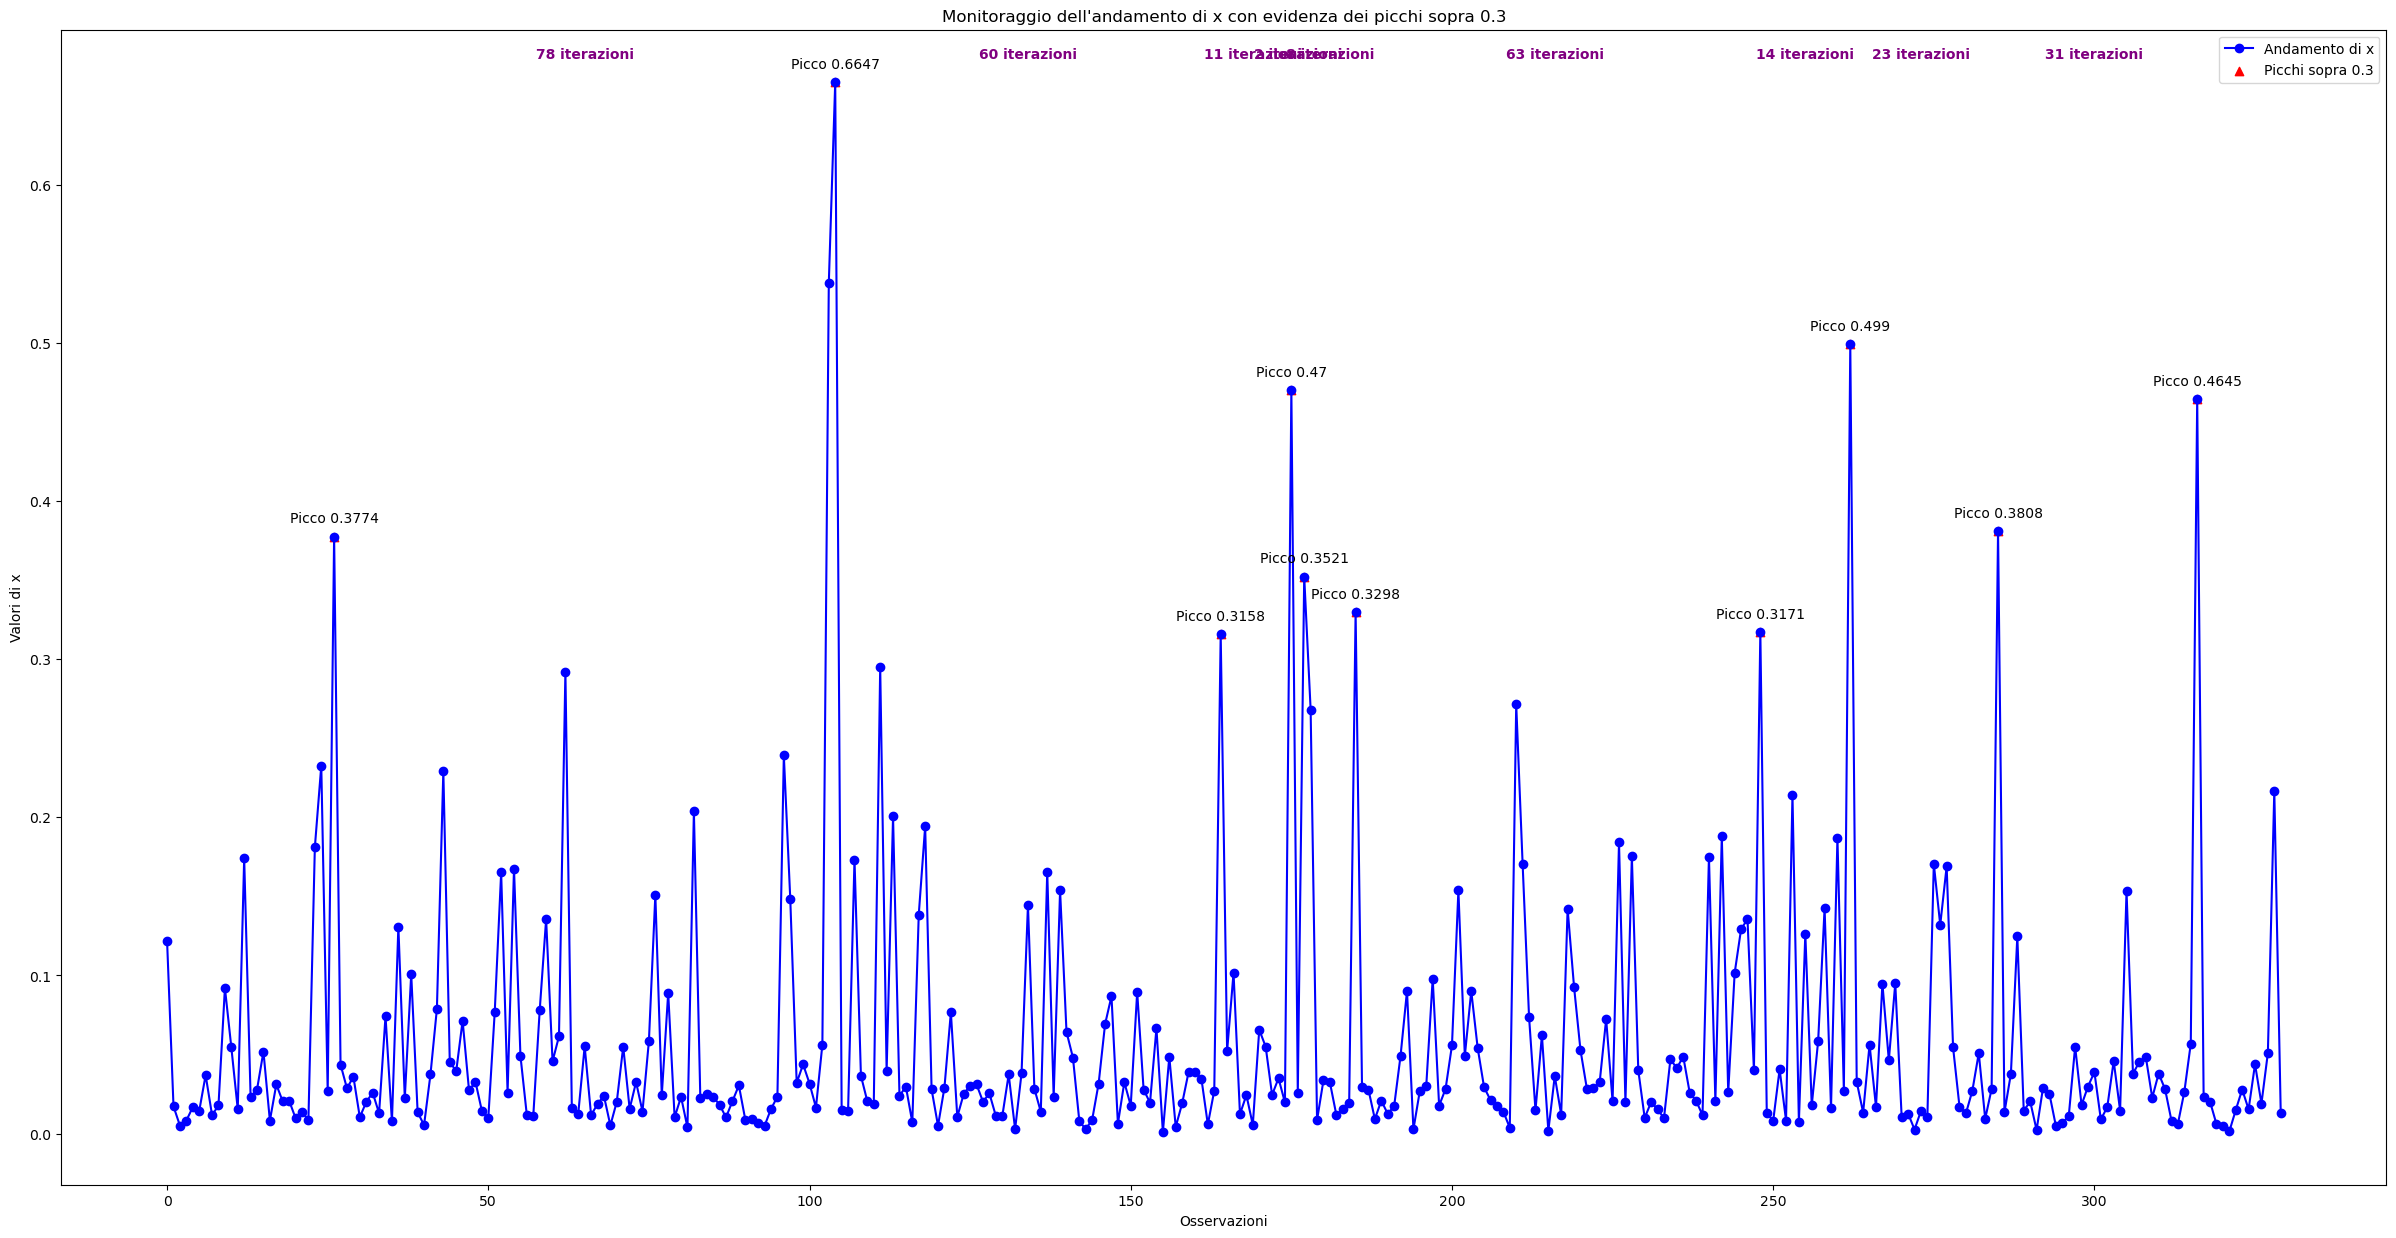

In [18]:
# Impostare le dimensioni della figura
plt.figure(figsize=(30, 15))

# Creazione del grafico di linea senza variabile temporale esplicita
plt.plot(np.arange(len(valori_x)), valori_x, marker='o', linestyle='-', color='b', label='Andamento di x')

# Trova i picchi sopra la soglia di 0.3
picchi = [i for i in range(1, len(valori_x)-1) if valori_x[i] > 0.3 and valori_x[i] > valori_x[i-1] and valori_x[i] > valori_x[i+1]]

# Evidenzia i picchi sopra la soglia nel grafico
plt.scatter(picchi, [valori_x[i] for i in picchi], color='red', marker='^', label='Picchi sopra 0.3')

# Aggiunta di etichette e titoli
plt.xlabel('Osservazioni')
plt.ylabel('Valori di x')
plt.title('Monitoraggio dell\'andamento di x con evidenza dei picchi sopra 0.3')

# Annotazione sopra i picchi
for i in picchi:
    plt.annotate(f'Picco {valori_x[i]}', (i, valori_x[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Annotazione del numero di iterazioni tra i picchi
for i in range(1, len(picchi)):
    distanza_iterazioni = picchi[i] - picchi[i-1]
    plt.annotate(f'{distanza_iterazioni} iterazioni', 
                 xy=((picchi[i]+picchi[i-1])//2, max(valori_x)), 
                 xytext=(0, 20), 
                 textcoords='offset points',
                 ha='center', va='center', color='purple', weight='bold')

# Aggiunta di una legenda
plt.legend()

# Visualizzazione del grafico
plt.show()

In [21]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("/work/asc/machine_learning/projects/iMagine/bayes_opt/use_cases/syria/MDK_BAYESOPT_SIM_2021_08_23_1000_0072h_150.0m_30000_syria_20240124-025111/final_result_20240124-025111.csv", sep=",")

valori_x1 = np.array(df['FSS'])

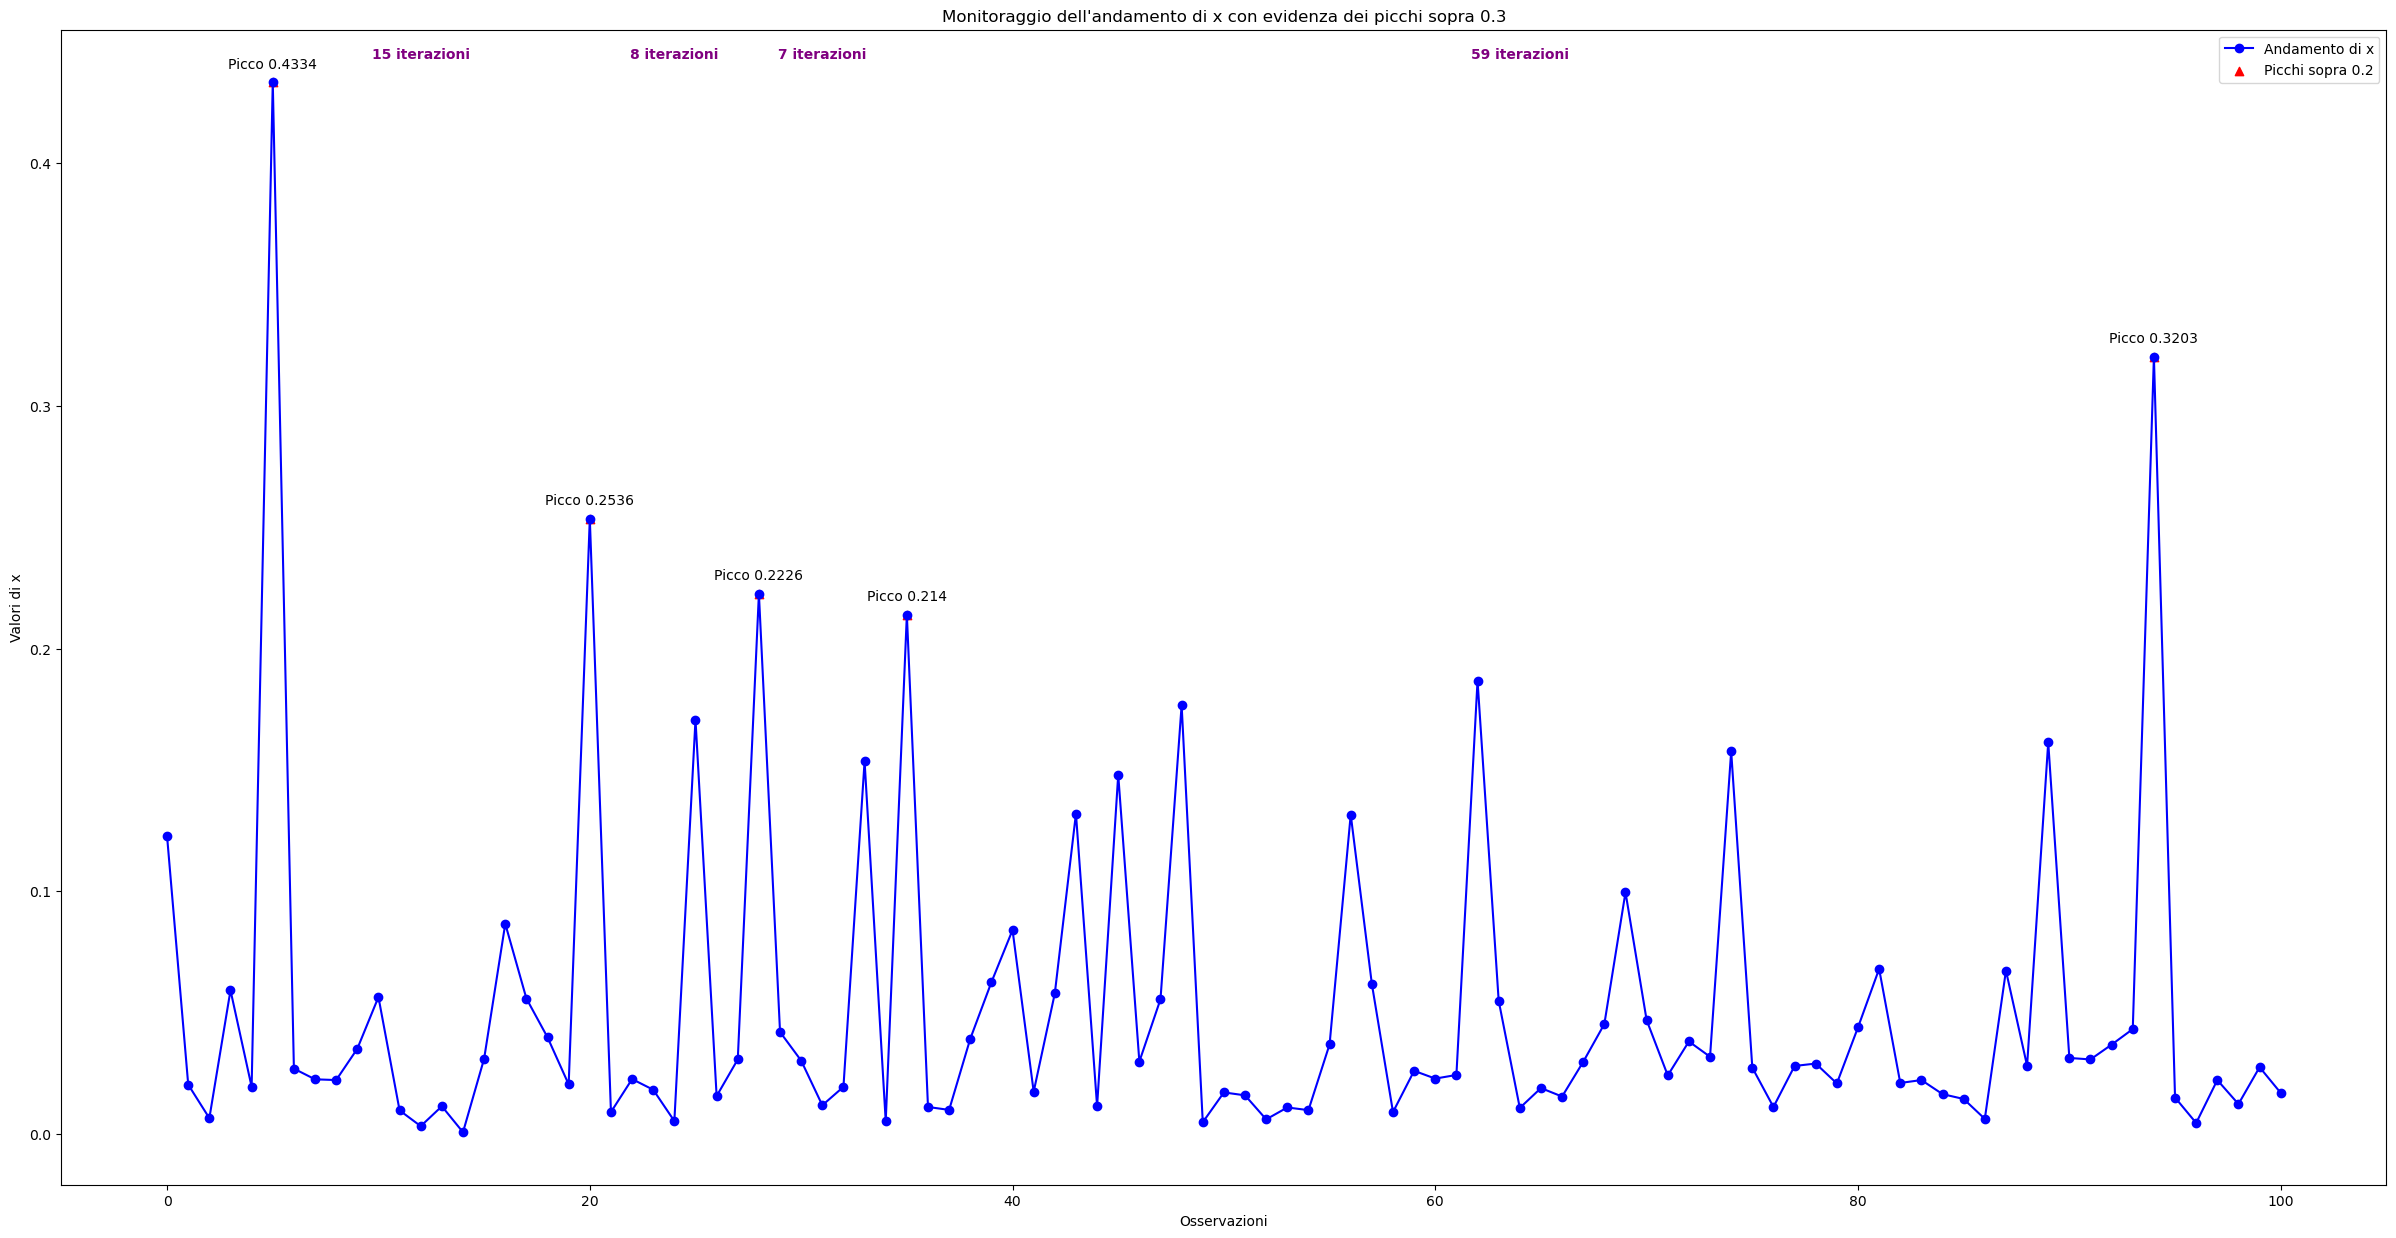

In [23]:
# Impostare le dimensioni della figura
plt.figure(figsize=(30, 15))

# Creazione del grafico di linea senza variabile temporale esplicita
plt.plot(np.arange(len(valori_x1)), valori_x1, marker='o', linestyle='-', color='b', label='Andamento di x')

# Trova i picchi sopra la soglia di 0.3
picchi = [i for i in range(1, len(valori_x1)-1) if valori_x1[i] > 0.2 and valori_x1[i] > valori_x1[i-1] and valori_x1[i] > valori_x1[i+1]]

# Evidenzia i picchi sopra la soglia nel grafico
plt.scatter(picchi, [valori_x1[i] for i in picchi], color='red', marker='^', label='Picchi sopra 0.2')

# Aggiunta di etichette e titoli
plt.xlabel('Osservazioni')
plt.ylabel('Valori di x')
plt.title('Monitoraggio dell\'andamento di x con evidenza dei picchi sopra 0.3')

# Annotazione sopra i picchi
for i in picchi:
    plt.annotate(f'Picco {valori_x1[i]}', (i, valori_x1[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Annotazione del numero di iterazioni tra i picchi
for i in range(1, len(picchi)):
    distanza_iterazioni = picchi[i] - picchi[i-1]
    plt.annotate(f'{distanza_iterazioni} iterazioni', 
                 xy=((picchi[i]+picchi[i-1])//2, max(valori_x1)), 
                 xytext=(0, 20), 
                 textcoords='offset points',
                 ha='center', va='center', color='purple', weight='bold')

# Aggiunta di una legenda
plt.legend()

# Visualizzazione del grafico
plt.show()

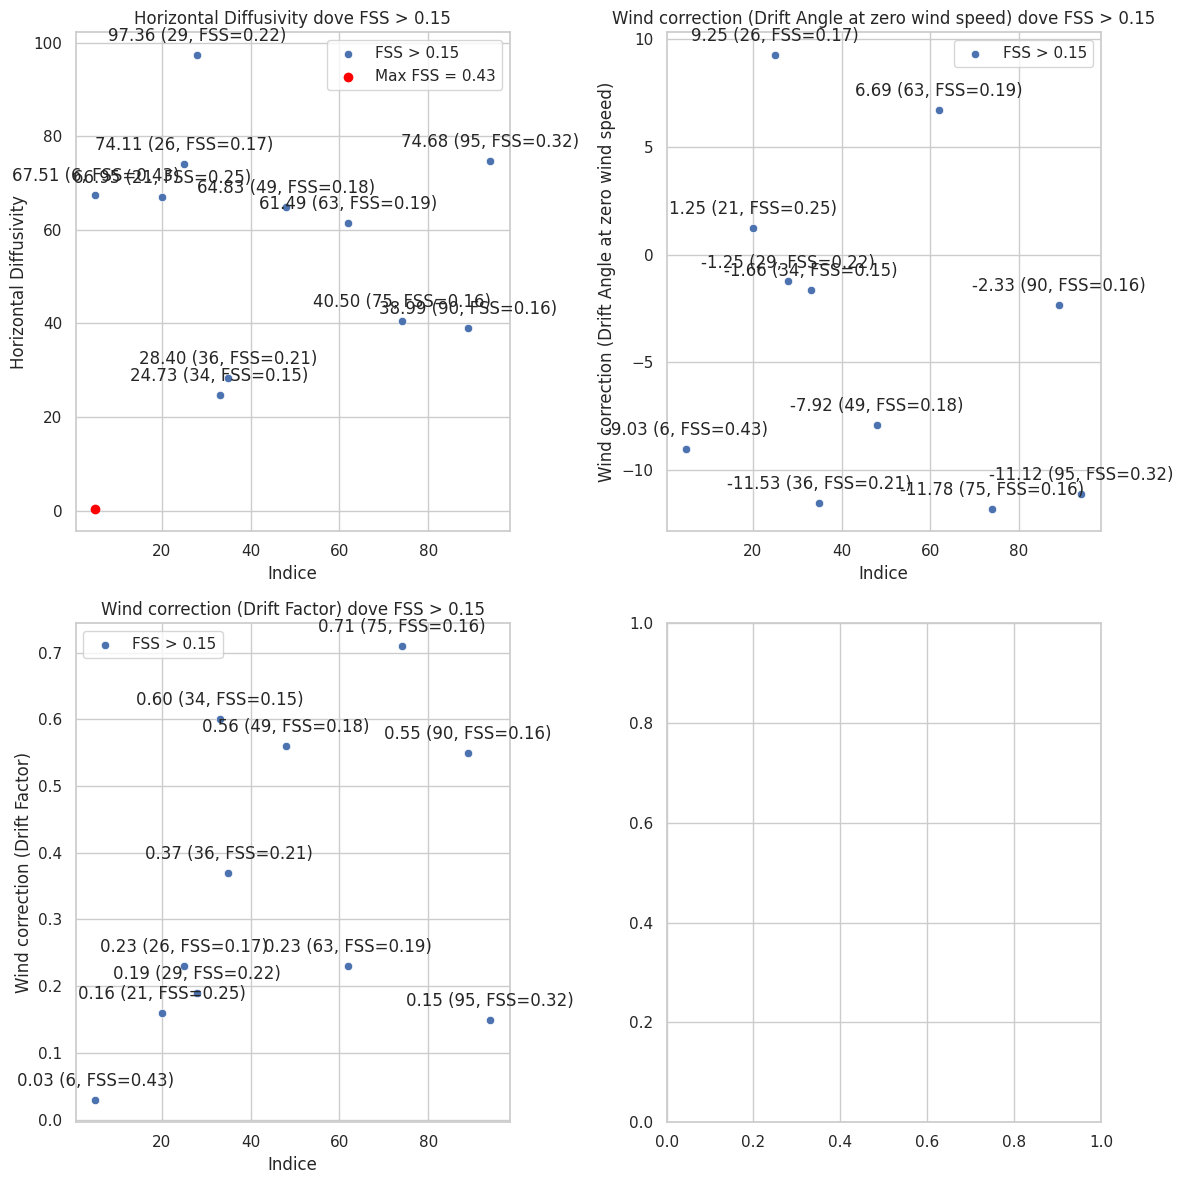

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Carica i dati dal CSV (supponiamo che il file si chiami 'dati.csv')
data = pd.read_csv("/work/asc/machine_learning/projects/iMagine/bayes_opt/use_cases/syria/MDK_BAYESOPT_SIM_2021_08_23_1000_0072h_150.0m_30000_syria_20240124-025111/final_result_20240124-025111.csv", sep=",")

# Seleziona la colonna 'FSS' come riferimento
colonna_riferimento = 'FSS'

# Imposta lo stile di Seaborn
sns.set(style="whitegrid")

# Trova il numero totale di colonne (escludendo 'FSS')
num_colonne = len(data.columns) - 1

# Calcola il numero di righe e colonne per i sottografici
num_righe = (num_colonne + 1) // 2  # Arrotondamento verso l'alto
num_colonne_subplot = 2

# Crea un oggetto figura con sottografici usando Seaborn
fig, axs = plt.subplots(nrows=num_righe, ncols=num_colonne_subplot, figsize=(12, num_righe * 6))

# Trova l'indice del valore più alto in 'FSS'
indice_fss_max = data['FSS'].idxmax()
valore_fss_max = data.loc[indice_fss_max, 'FSS']

# Loop attraverso tutte le colonne del dataframe e confronta con 'FSS'
for i, colonna in enumerate(data.columns):
    if colonna != colonna_riferimento:
        # Calcola l'indice della riga e della colonna per il sottografo corrente
        riga_subplot = i // num_colonne_subplot
        colonna_subplot = i % num_colonne_subplot

        # Filtra i valori delle altre colonne dove 'FSS' è più grande di 0.15
        valori_significativi = data.loc[data[colonna_riferimento] > 0.15, colonna]

        # Disegna lo scatterplot mostrando solo i valori significativi
        sns.scatterplot(x=valori_significativi.index, y=valori_significativi, ax=axs[riga_subplot, colonna_subplot], label=f'{colonna_riferimento} > 0.15')

        # Aggiunta di etichette e titoli al sottografo corrente
        axs[riga_subplot, colonna_subplot].set_xlabel('Indice')
        axs[riga_subplot, colonna_subplot].set_ylabel(colonna)
        axs[riga_subplot, colonna_subplot].set_title(f'{colonna} dove {colonna_riferimento} > 0.15')
        axs[riga_subplot, colonna_subplot].legend()

        # Annotazioni sui punti con o, numero di iterazione e valore di FSS
        for index, value in zip(valori_significativi.index, valori_significativi):
            iteration_number = index + 1  # L'indice di Python parte da 0, quindi aggiungiamo 1 per ottenere il numero di iterazione
            axs[riga_subplot, colonna_subplot].annotate(f'{value:.2f} ({iteration_number}, FSS={data.loc[index, "FSS"]:.2f})', (index, value), textcoords="offset points", xytext=(0,10), ha='center')

# Aggiungi un marker rosso per il valore più alto di 'FSS' con annotazione
axs[0, 0].scatter(indice_fss_max, valore_fss_max, color='red', marker='o', label=f'Max FSS = {valore_fss_max:.2f}')
axs[0, 0].legend()

# Regola l'aspetto della figura
plt.tight_layout()

# Visualizzazione del grafico
plt.show()

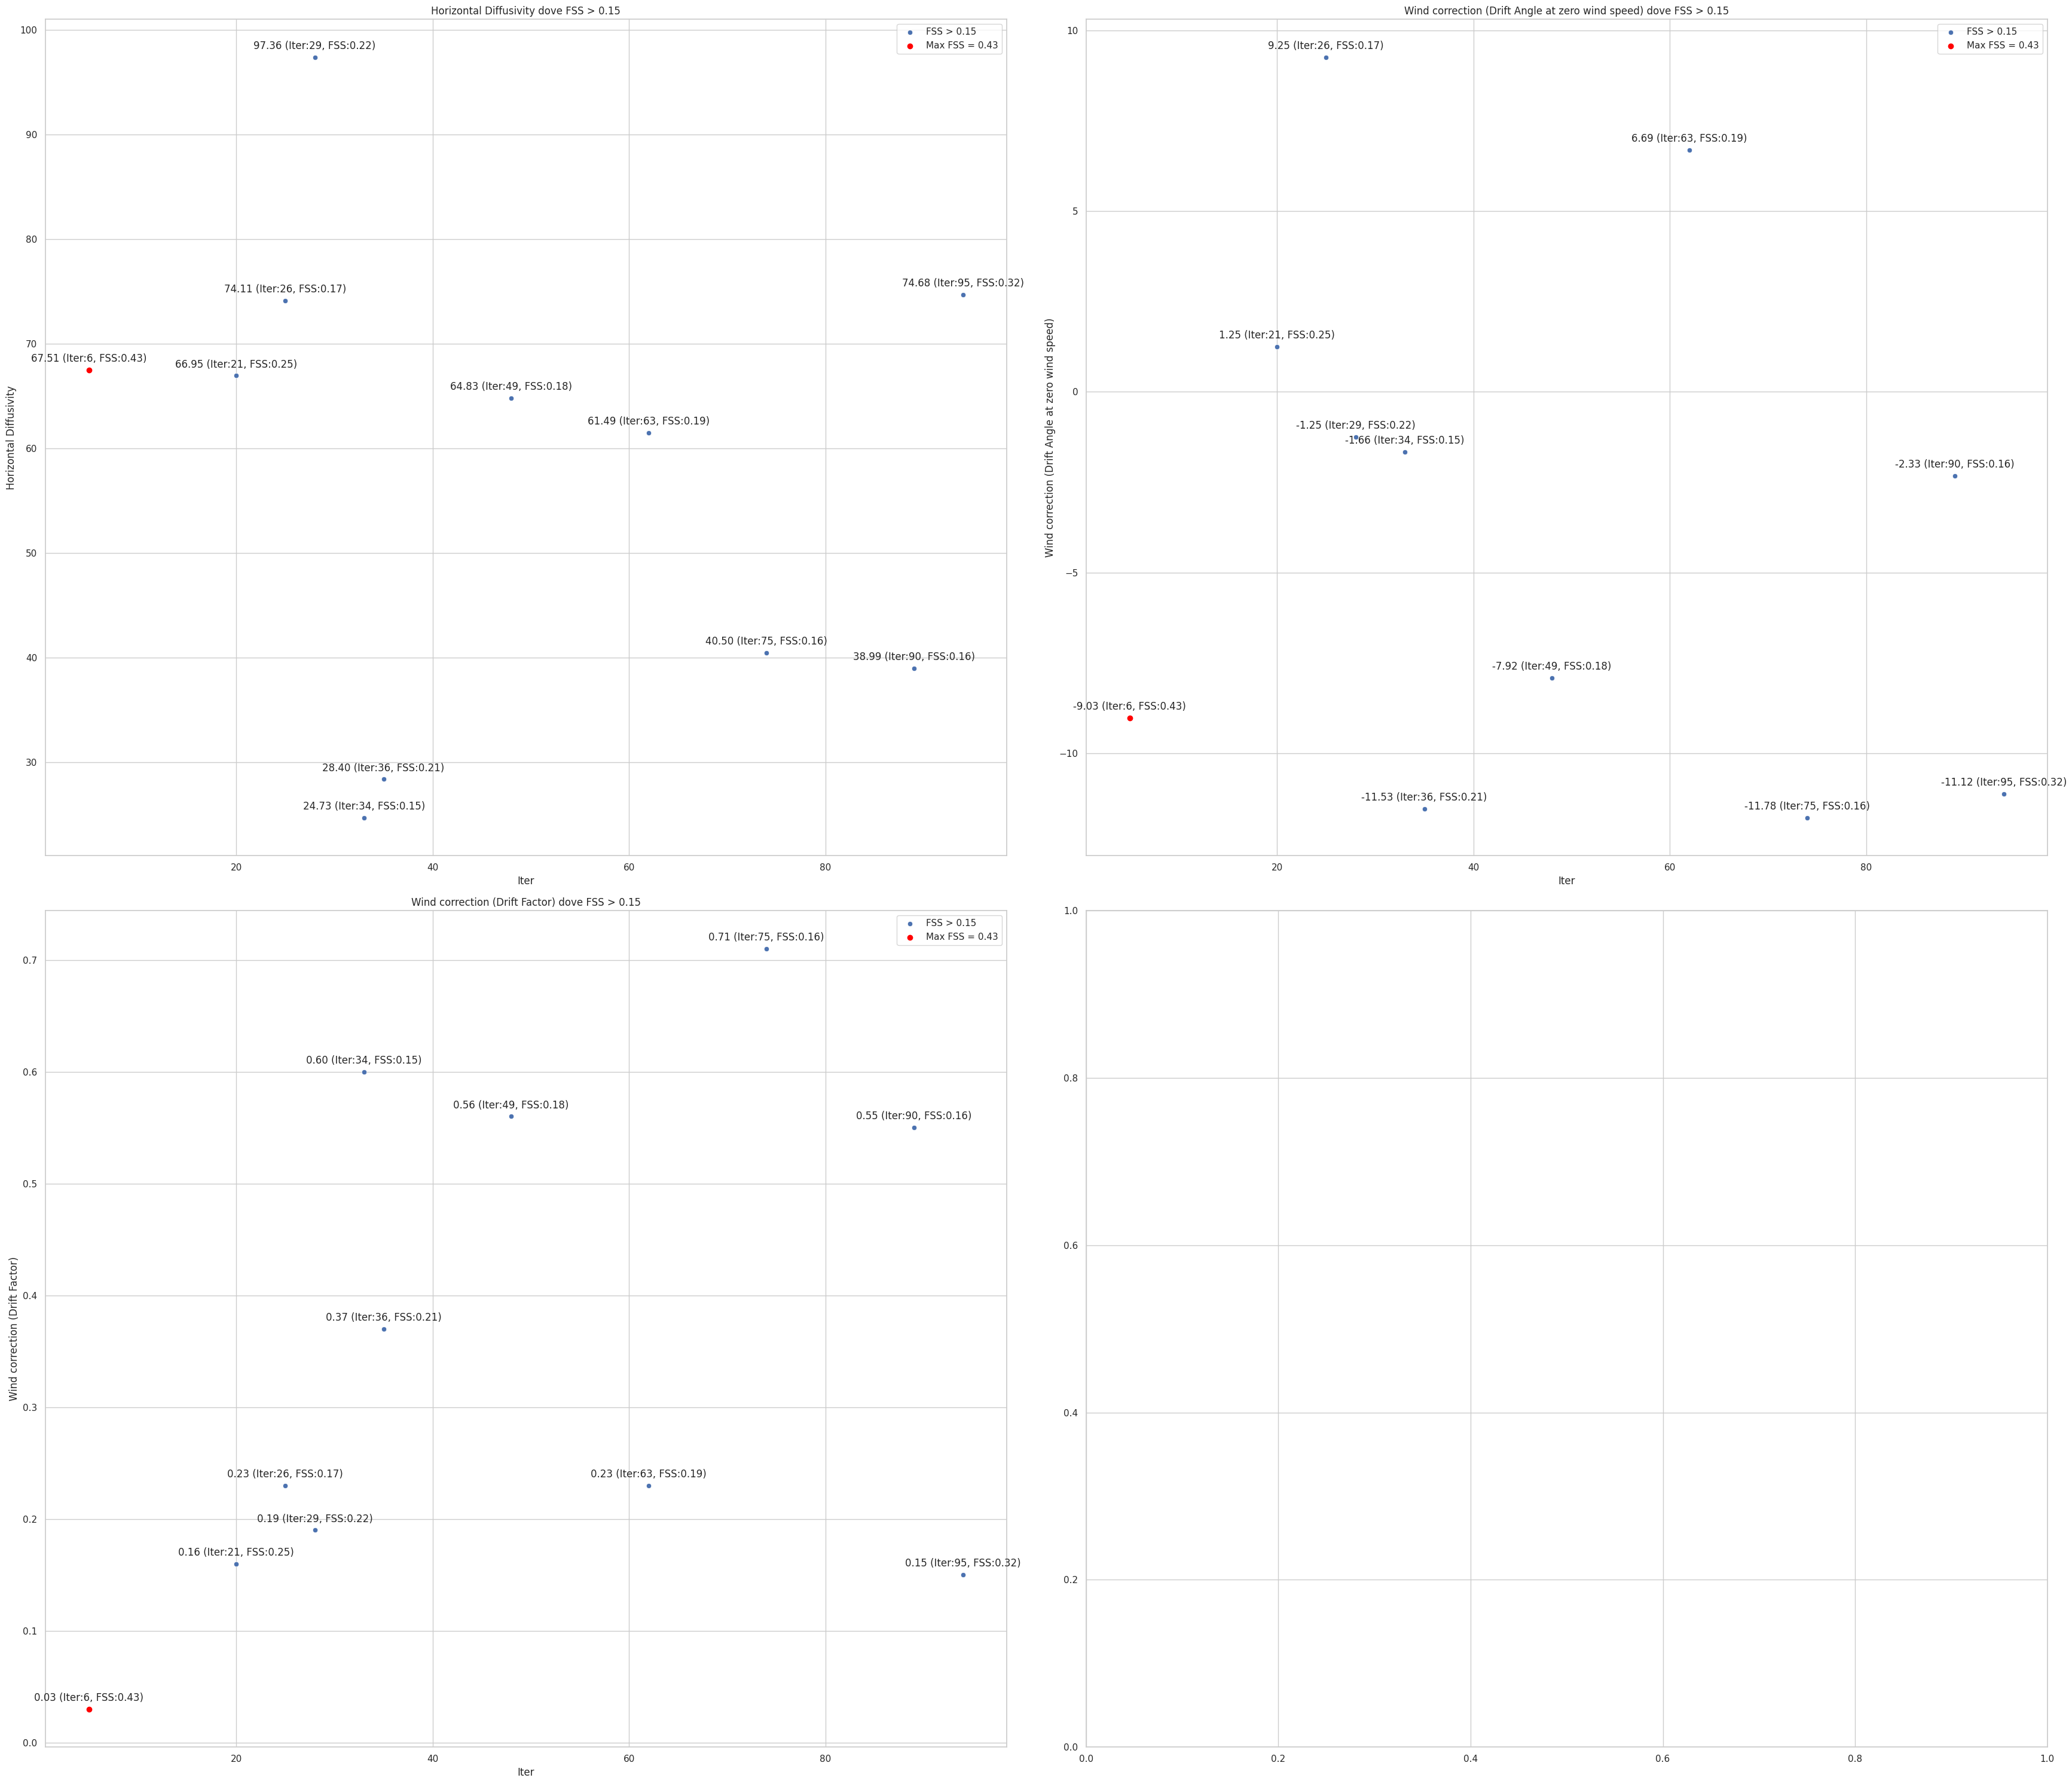

In [52]:
# Seleziona la colonna 'FSS' come riferimento
colonna_riferimento = 'FSS'

# Imposta lo stile di Seaborn
sns.set(style="whitegrid")

# Trova il numero totale di colonne (escludendo 'FSS')
num_colonne = len(data.columns) - 1

# Calcola il numero di righe e colonne per i sottografici
num_righe = (num_colonne + 1) // 2  # Arrotondamento verso l'alto
num_colonne_subplot = 2

# Crea un oggetto figura con sottografici usando Seaborn
fig, axs = plt.subplots(nrows=num_righe, ncols=num_colonne_subplot, figsize=(35, num_righe * 15))

# Trova l'indice del valore più alto in 'FSS' e il suo valore
indice_fss_max = data['FSS'].idxmax()
valore_fss_max = data.loc[indice_fss_max, 'FSS']

# Loop attraverso tutte le colonne del dataframe e confronta con 'FSS'
for i, colonna in enumerate(data.columns):
    if colonna != colonna_riferimento:
        # Calcola l'indice della riga e della colonna per il sottografo corrente
        riga_subplot = i // num_colonne_subplot
        colonna_subplot = i % num_colonne_subplot

        # Filtra i valori delle altre colonne dove 'FSS' è più grande di 0.15
        valori_significativi = data.loc[data[colonna_riferimento] > 0.15, colonna]

        # Disegna lo scatterplot mostrando solo i valori significativi
        sns.scatterplot(x=valori_significativi.index, y=valori_significativi, ax=axs[riga_subplot, colonna_subplot], label=f'{colonna_riferimento} > 0.15')

        # Aggiungi un marker rosso per il valore più alto di 'FSS' con annotazione
        axs[riga_subplot, colonna_subplot].scatter(indice_fss_max, data.loc[indice_fss_max, colonna], color='red', marker='o', label=f'Max FSS = {valore_fss_max:.2f}')

        # Aggiunta di etichette e titoli al sottografo corrente
        axs[riga_subplot, colonna_subplot].set_xlabel('Iter')
        axs[riga_subplot, colonna_subplot].set_ylabel(colonna)
        axs[riga_subplot, colonna_subplot].set_title(f'{colonna} dove {colonna_riferimento} > 0.15')
        axs[riga_subplot, colonna_subplot].legend()

        # Annotazioni sui punti con o e numero di iterazione
        for index, value in zip(valori_significativi.index, valori_significativi):
            iteration_number = index + 1  # L'indice di Python parte da 0, quindi aggiungiamo 1 per ottenere il numero di iterazione
            axs[riga_subplot, colonna_subplot].annotate(f'{value:.2f} (Iter:{iteration_number}, FSS:{data.loc[index, "FSS"]:.2f})', (index, value), textcoords="offset points", xytext=(0,10), ha='center')

# Regola l'aspetto della figura
plt.tight_layout()

# Visualizzazione del grafico
plt.show()

In [9]:
import pandas as pd

df = pd.read_csv("/work/asc/machine_learning/projects/iMagine/bayes_opt/use_cases/syria/MDK_BAYESOPT_SIM_2021_08_23_1000_0072h_150.0m_30000_syria_20240129-143425/final_result_20240129-143425.csv", sep=",")

df.loc[df['FSS'] == df['FSS'].max()]


,Horizontal Diffusivity,Wind correction (Drift Angle at zero wind speed),Wind correction (Drift Factor),FSS
5,1.25,3.31,0.02,0.7574


In [6]:
import xarray as xr

ds = xr.open_dataset("/work/asc/machine_learning/projects/iMagine/bayes_opt/simulation/Medslik-II/MEDSLIK_II_3.01/OUT/MDK_SIM_2021_08_23_1000_syria/spill_properties.nc")
ds

<xarray.Dataset>
Dimensions:                 (time: 72, parcel_id: 30004)
Coordinates:
  * time                    (time) timedelta64[ns] 01:00:00 ... 3 days 00:00:00
Dimensions without coordinates: parcel_id
Data variables: (12/17)
    latitude                (time, parcel_id) float32 ...
    longitude               (time, parcel_id) float32 ...
    evaporative_volume      (time, parcel_id) float32 ...
    non_evaporative_volume  (time, parcel_id) float32 ...
    water_fraction          (time, parcel_id) float32 ...
    particle_status         (time, parcel_id) float32 ...
    ...                      ...
    viscosity_oil_2         (time) float32 ...
    density_emulsion_1      (time) float32 ...
    density_emulsion_2      (time) float32 ...
    water_fraction_1        (time) float32 ...
    water_fraction_2        (time) float32 ...
    volume_ratio            (time) float32 ...

In [35]:
lt = ds.latitude
print(lt.sel(time=slice("3600000000000")).max())

lo = ds.longitude
print(lo.sel(time=slice("3600000000000")).max())

<xarray.DataArray 'latitude' ()>
array(35.176296, dtype=float32)
<xarray.DataArray 'longitude' ()>
array(35.923565, dtype=float32)


In [32]:
import numpy as np

lon = np.longdouble(ds.variables['longitude'][36,:])
lat = np.longdouble(ds.variables['latitude'][36,:])
print(lon)
print(lat)

[35.97364426 35.96379089 35.97975922 ... 35.91669846 35.91669846
 35.91669846]
[35.23051834 35.22103119 35.22975159 ... 35.17259979 35.17259979
 35.17259979]


In [33]:
import netCDF4

fname = "/work/asc/machine_learning/projects/iMagine/bayes_opt/simulation/Medslik-II/MEDSLIK_II_3.01/OUT/MDK_SIM_2021_08_23_1000_syria/spill_properties.nc"
f = netCDF4.Dataset(fname)

particle_status = f.variables['particle_status'][36, :]
floatingParticles=np.logical_and(particle_status > 0, particle_status <= 2).nonzero()[0]
print(floatingParticles)
lons_f=lon[floatingParticles]
lats_f=lat[floatingParticles]
print(lons_f)
print(lats_f)


[    0     1     2 ... 15389 15390 15391]
[35.97364426 35.96379089 35.97975922 ... 35.91708755 35.91630173
 35.91640472]
[35.23051834 35.22103119 35.22975159 ... 35.17281342 35.17285919
 35.17238998]


In [49]:
np.longdouble(.15)/110.

0.001363636363636363586

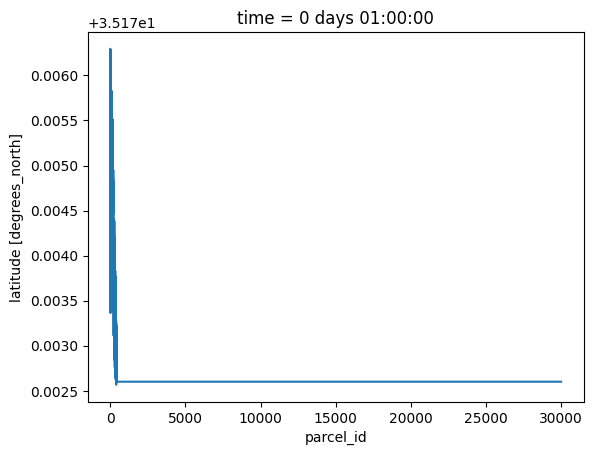

In [12]:
lt.sel(time=slice("3600000000000")).plot()

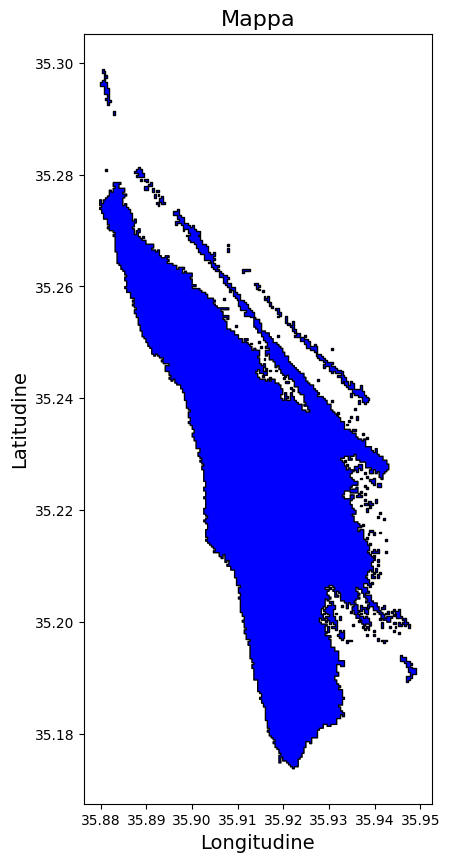

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

shp_file = "/work/asc/machine_learning/projects/iMagine/bayes_opt/use_case_observations/syria/observations_2021_08_23_1000/20210824-0343-SYR-PL-B-01-S1/20210824-0343-SYR-PL-B-01-S1.shp"
gdf = gpd.read_file(shp_file)

# Visualizza la mappa
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', edgecolor='black')

# Aggiungi titolo e asse x, y
plt.title('Mappa', fontsize=16)
plt.xlabel('Longitudine', fontsize=14)
plt.ylabel('Latitudine', fontsize=14)

# Mostra la mappa
plt.show()

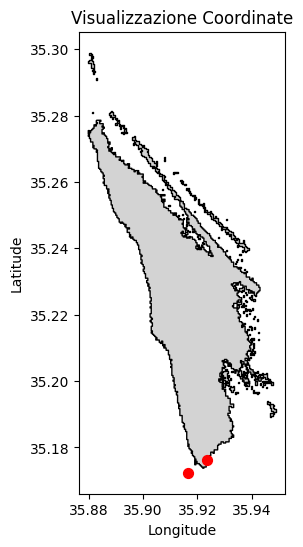

In [46]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

coord1 = (35.176296, 35.923565)
coord2 = (35.17238998, 35.91640472)

geometry = [Point(lon, lat) for lat, lon in [coord1, coord2]]
gdf_points = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

shapefile_path = "/work/asc/machine_learning/projects/iMagine/bayes_opt/use_case_observations/syria/observations_2021_08_23_1000/20210824-0343-SYR-PL-B-01-S1/20210824-0343-SYR-PL-B-01-S1.shp"
gdf_shapefile = gpd.read_file(shapefile_path)

fig, ax = plt.subplots(figsize=(10, 6))

gdf_shapefile.plot(ax=ax, color='lightgray', edgecolor='black')

gdf_points.plot(ax=ax, color='red', markersize=50, marker='o')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Visualizzazione Coordinate')

plt.show()

In [50]:
from shapely.geometry import Polygon

def make_poly_grid(xmin,xmax,ymin,ymax,cell_size):

    cols = list(np.arange(xmin, xmax+cell_size, cell_size))
    rows = list(np.arange(ymin, ymax+cell_size, cell_size))

    polygons = []
    for x in cols[:-1]:
        for y in rows[:-1]:
            polygons.append(Polygon([(x,y), (x+cell_size, y), (x+cell_size, y+cell_size), (x, y+cell_size)]))
            
    cell = gpd.GeoDataFrame({'geometry':polygons}).set_crs('EPSG:4326',allow_override=True)

    return cell

make_poly_grid()